**You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.**

**FEATURES:**

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

data= pd.read_csv("C:\\Users\\croma\\OneDrive\\Desktop\\train-data.csv")
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [2]:
data.shape

(6019, 14)

In [3]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
df=data.copy()
df.head(2)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


**Replacing string from values**

In [7]:
df['Mileage'] = df['Mileage'].apply(lambda x: float(str(x).split(" ")[0]))
df['Engine'] = df['Engine'].apply(lambda x: float(str(x).split(" ")[0]))


we did this because someone put (nan bhp) in Power column.


In [8]:
df[df.Power == 'null bhp']

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,null bhp,5.0,NaN,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,null bhp,5.0,NaN,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,null bhp,5.0,NaN,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,null bhp,5.0,NaN,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,null bhp,5.0,NaN,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,null bhp,5.0,NaN,1.20
5893,5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,null bhp,NaN,NaN,1.75
5925,5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,null bhp,5.0,NaN,2.85
5943,5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,null bhp,6.0,NaN,1.70


drop those rows which have "null bhp"

In [9]:
indexNames = df[ df['Power'] == "null bhp" ].index
df.drop(indexNames , inplace=True)

In [10]:
df.shape

(5912, 14)

In [11]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5088
Price                   0
dtype: int64

In [12]:
df['Power'] = df['Power'].apply(lambda x: float(str(x).split(" ")[0]))

In [13]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


Now we fill missing values<br>And drop New_price column


In [14]:
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
df['Engine'].fillna(df['Engine'].mean(), inplace=True)
df['Power'].fillna(df['Power'].median(), inplace=True)
df['Seats'].fillna(df['Seats'].mean(), inplace=True)
df.drop(['New_Price'],axis=1,inplace=True)
df.drop(['Unnamed: 0'],axis=1,inplace=True)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 0 to 6018
Data columns (total 12 columns):
Name                 5912 non-null object
Location             5912 non-null object
Year                 5912 non-null int64
Kilometers_Driven    5912 non-null int64
Fuel_Type            5912 non-null object
Transmission         5912 non-null object
Owner_Type           5912 non-null object
Mileage              5912 non-null float64
Engine               5912 non-null float64
Power                5912 non-null float64
Seats                5912 non-null float64
Price                5912 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 600.4+ KB


Now we change dtype

In [16]:
df['Engine']=df['Engine'].astype('int64')
df['Power']=df['Power'].astype('int64')
df['Seats']=df['Seats'].astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 0 to 6018
Data columns (total 12 columns):
Name                 5912 non-null object
Location             5912 non-null object
Year                 5912 non-null int64
Kilometers_Driven    5912 non-null int64
Fuel_Type            5912 non-null object
Transmission         5912 non-null object
Owner_Type           5912 non-null object
Mileage              5912 non-null float64
Engine               5912 non-null int64
Power                5912 non-null int64
Seats                5912 non-null int64
Price                5912 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 600.4+ KB


In [18]:
#Splitting company name from CarName column
CompanyName = df['Name'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['Name'],axis=1,inplace=True)
df.head()

,Location,Year,CompanyName,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,Maruti,72000,CNG,Manual,First,26.60,998,58,5,1.75
1,Pune,2015,Hyundai,41000,Diesel,Manual,First,19.67,1582,126,5,12.50
2,Chennai,2011,Honda,46000,Petrol,Manual,First,18.20,1199,88,5,4.50
3,Chennai,2012,Maruti,87000,Diesel,Manual,First,20.77,1248,88,7,6.00
4,Coimbatore,2013,Audi,40670,Diesel,Automatic,Second,15.20,1968,140,5,17.74


In [19]:
test=pd.read_csv("Carpricetest.csv")
test.shape

(1212, 11)

In [20]:
main_df=df.copy()


In [21]:
final_model=pd.concat([main_df,test],axis=0)
final_model.shape


(7124, 12)

In [22]:
model=pd.get_dummies(final_model,drop_first=True)
model.shape

(7124, 55)

In [23]:
model=model.loc[:,~model.columns.duplicated()]
model.shape

(7124, 55)

In [24]:
#split in original
train=model.iloc[:5912,:]
test=model.iloc[5912:,:]

In [25]:
test.head(1)

,Engine,Kilometers_Driven,Mileage,Power,Price,Seats,Year,CompanyName_Audi,CompanyName_BMW,CompanyName_Bentley,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Transmission_Manual
0,998,40929,32.26,58,NaN,4,2014,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
#remove price column from test 
test.drop(["Price"],axis=1,inplace=True)
test.head(1)

,Engine,Kilometers_Driven,Mileage,Power,Seats,Year,CompanyName_Audi,CompanyName_BMW,CompanyName_Bentley,CompanyName_Chevrolet,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Transmission_Manual
0,998,40929,32.26,58,4,2014,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Now we remove all missing values from train and test dataset.
we also give same nnumbers of columns to train and test.<br>As we clean our test dataset, Now we work on train dataset to make for algorithm.

First we check correlation

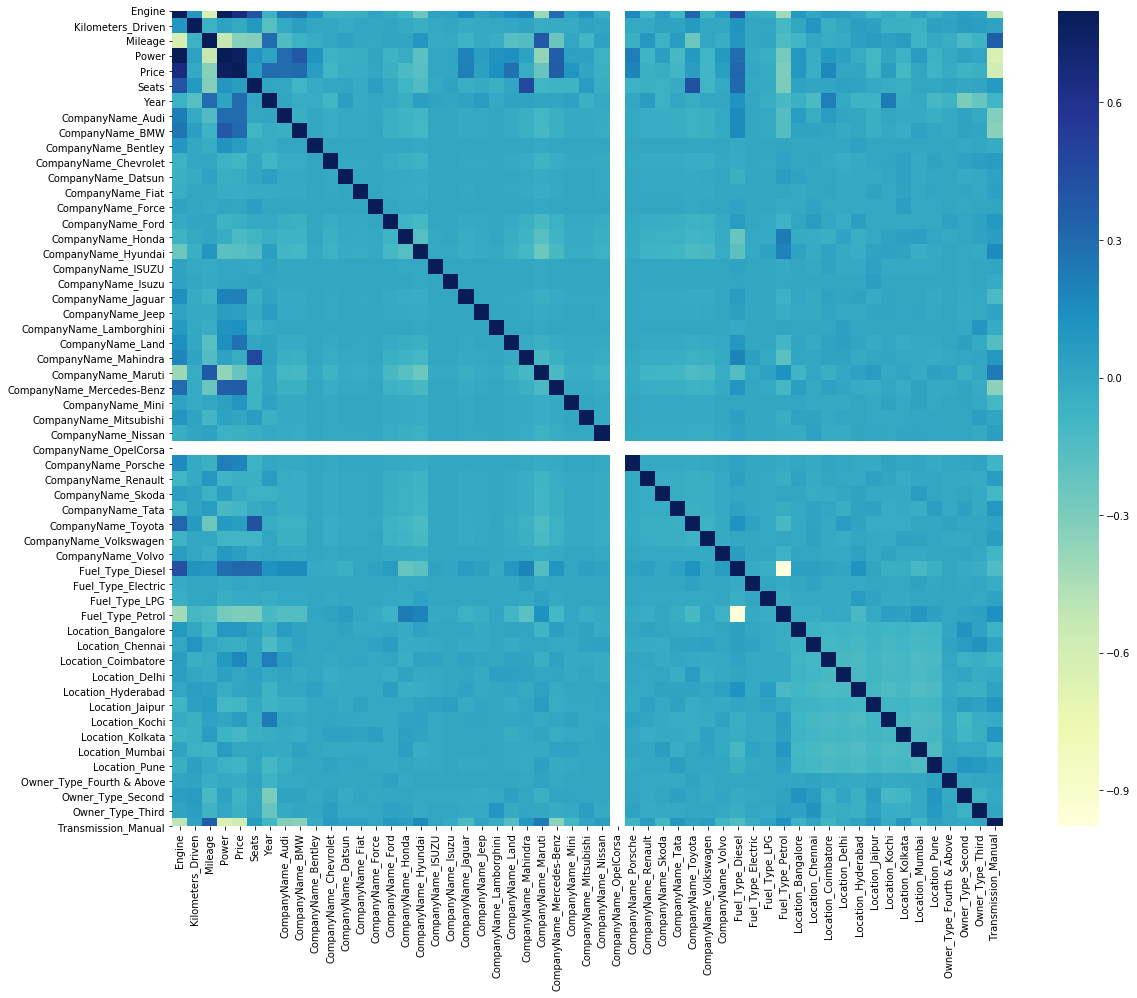

In [27]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(matrix, vmax=.8, square=True, cmap="YlGnBu");

Now we split our train dataset for test and train for algorithm

In [28]:
X=train.drop("Price",axis=1)
Y=train['Price']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.10,random_state=42)

In [30]:
X_train.shape

(5320, 54)

shorlist Models

Root mean square error

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

models=[]
models.append(("LR",LinearRegression()))
models.append(("DTR",DecisionTreeRegressor(max_depth=2)))
models.append(("SVM",SVR()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("RF",RandomForestRegressor()))

for name, model in models:
    model.fit(X_train,Y_train)
    housing=model.predict(X_train)
    lin_mse=mean_squared_error(Y_train,housing)
    ab=np.sqrt(lin_mse)
    print(name,ab)

LR 5.330921226380324
DTR 6.907876417766617
SVM 11.433498143737822
KNN 5.882153053910112
RF 1.6065292677109573


using K-fold cross_validation

Root mean Square error

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

models1=[]
models1.append(("LR",LinearRegression()))
models1.append(("DTR",DecisionTreeRegressor()))
models1.append(("SVM",SVR()))
models1.append(("KNN",KNeighborsRegressor()))
models1.append(("RF",RandomForestRegressor()))
results = []
names = []
for name, model in models1:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="neg_mean_squared_error")
    score=np.sqrt(-cv_results)
    results.append(score)
    names.append(name)
    msg = "%s: %f (%f)" % (name, score.mean(), score.std())
    print(msg)

LR: 5.798955 (1.162341)
DTR: 4.988635 (0.818820)
SVM: 11.861005 (1.105479)
KNN: 7.367268 (0.812764)
RF: 3.713866 (0.875406)


Feature Scaling with K-fold cross-validation
Standardization

Root Mean Square error

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
 LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
 KNeighborsRegressor())])))
pipelines.append(('ScaledDTR', Pipeline([('Scaler', StandardScaler()),('DTR',
 DecisionTreeRegressor())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
pipelines.append(("ScaledRFR", Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
results = []
names = []
for name, model in pipelines:
    
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="neg_mean_squared_error")
    score=np.sqrt(-cv_results)
    results.append(score)
    names.append(name)
    msg = "%s: %f (%f)" % (name, score.mean(), score.std())
    print(msg)

ScaledLR: 47164363989.896111 (91137216835.541061)
ScaledKNN: 5.499775 (0.979452)
ScaledDTR: 5.045532 (0.715654)
ScaledSVM: 6.066941 (1.127305)
ScaledRFR: 3.844989 (0.921106)


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
 AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
 GradientBoostingRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
 ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="neg_mean_squared_error")
    score=np.sqrt(-cv_results)
    results.append(score)
    names.append(name)
    msg = "%s: %f (%f)" % (name, score.mean(), score.std())
    print(msg)

ScaledAB: 7.344104 (0.733652)
ScaledGBM: 3.707931 (0.671581)
ScaledET: 3.645524 (0.852606)


 ExtraTreesRegressor is best

In [44]:
from sklearn.model_selection import GridSearchCV
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
param_grid =[{'n_estimators':[3,10,30,15,5]}]
forest_reg= ExtraTreesRegressor()
kfold = KFold(n_splits=10, random_state=7)
grid = GridSearchCV(estimator=forest_reg, param_grid=param_grid, scoring="neg_mean_squared_error", cv=kfold,return_train_score=True)
grid_result = grid.fit(X_train, Y_train)
print(grid_result.best_estimator_)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)


In [57]:
final_model=grid_result.best_estimator_
go=final_model.predict(X_test)
root=mean_squared_error(Y_test,go)
root1=np.sqrt(root)
root1

2.498665502081319

In [58]:
final_model.predict(test)

array([28.22766667, 28.47666667, 27.76166667, ..., 28.29266667,
       34.818     , 39.02766667])